<a href="https://colab.research.google.com/github/Uz8351/MyPhython/blob/master/Aula_28_Serie_Encode_Decode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')



import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
import os
import keras
# Establecer la variable de entorno para forzar el uso de la CPU
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

# Cargar la imagen desde la ruta especificada
image_path = '/content/drive/MyDrive/coche.jpg'
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Normalizar la imagen a valores entre 0 y 1
original_image = original_image / 255.0

# Redimensionar todas las imágenes a un tamaño fijo (puedes ajustar según tus necesidades)
target_size = (256, 256)
original_image = cv2.resize(original_image, target_size)

# Agregar una dimensión para representar el lote (batch) de imágenes
original_image = np.expand_dims(original_image, axis=0)

# Definir la arquitectura del modelo encoder-decoder
input_layer = Input(shape=(target_size[0], target_size[1], 3))
encoder = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
encoder = MaxPooling2D((2, 2), padding='same')(encoder)

# Tamaño del filtro en el decoder
decoder = Conv2D(32, (5, 5), activation='relu', padding='same')(encoder)
decoder = UpSampling2D((2, 2))(decoder)
output_layer = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(decoder)

# Crear el modelo
model = Model(inputs=input_layer, outputs=output_layer)

# Compilar el modelo (puedes ajustar la función de pérdida según tu tarea)
model.compile(optimizer='adam', loss='mean_squared_error')

# Visualizar la imagen original
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(original_image[0])
plt.axis('off')

# Tamaño del lote (batch size)
batch_size = 16  # ajusta según tus recursos de GPU/CPU
# Entrenar el modelo
model.fit(original_image, original_image, epochs=10, batch_size=batch_size, verbose=1)

# Guardar el modelo entrenado
model.save("modelo_entrenado.h5")

# Cargar el modelo entrenado
loaded_model = keras.models.load_model("modelo_entrenado.h5")

# Obtener la salida del modelo para la imagen original
decoded_image = loaded_model.predict(original_image)

# Visualizar la imagen reconstruida por el decoder
plt.subplot(1, 2, 2)
plt.title('Imagen Reconstruida')
plt.imshow(decoded_image[0])
plt.axis('off')

# Mostrar las imágenes
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 0.0758
Epoch 2/20
1/1 [==============================] - 1s 547ms/step - loss: 0.0261
Epoch 3/20
1/1 [==============================] - 1s 578ms/step - loss: 0.0204
Epoch 4/20
1/1 [==============================] - 1s 561ms/step - loss: 0.0191
Epoch 5/20
1/1 [==============================] - 1s 525ms/step - loss: 0.0181
Epoch 6/20
1/1 [==============================] - 1s 614ms/step - loss: 0.0167
Epoch 7/20
1/1 [==============================] - 1s 838ms/step - loss: 0.0157
Epoch 8/20
1/1 [==============================] - 1s 897ms/step - loss: 0.0148
Epoch 9/20
1/1 [==============================] - 1s 842ms/step - loss: 0.0138
Epoch 10/20
1/1 [==============================] - 1s 835ms/step - loss: 0.0126
Epoch 11/20
1/1 [==============================] - 1s 807ms/step - loss: 0.0115
Epo

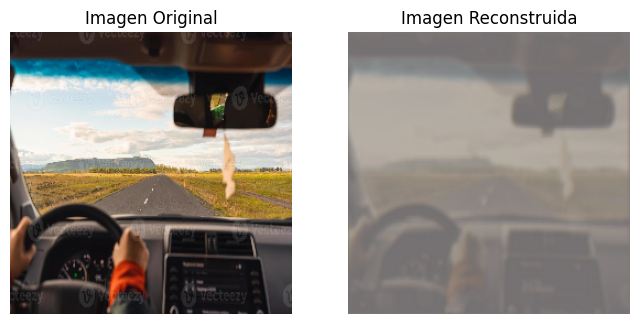

In [16]:
from google.colab import drive
drive.mount('/content/drive')




import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization
import keras
# Establecer la variable de entorno para forzar el uso de la CPU
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
image_path = '/content/drive/MyDrive/coche.jpg'



# Cargar la imagen desde la ruta especificada

original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Normalizar la imagen a valores entre 0 y 1
original_image = original_image / 255.0

# Redimensionar todas las imágenes a un tamaño fijo (puedes ajustar según tus necesidades)
target_size = (256, 256)
original_image = cv2.resize(original_image, target_size)

# Agregar una dimensión para representar el lote (batch) de imágenes
original_image = np.expand_dims(original_image, axis=0)

# Definir la arquitectura del modelo encoder-decoder mejorado
input_layer = Input(shape=(target_size[0], target_size[1], 3))
encoder = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
encoder = BatchNormalization()(encoder)
encoder = MaxPooling2D((2, 2), padding='same')(encoder)

decoder = Conv2D(64, (3, 3), activation='relu', padding='same')(encoder)
decoder = BatchNormalization()(decoder)
decoder = UpSampling2D((2, 2))(decoder)
output_layer = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(decoder)

# Crear el modelo
model = Model(inputs=input_layer, outputs=output_layer)

# Compilar el modelo (puedes ajustar la función de pérdida según tu tarea)
model.compile(optimizer='adam', loss='mean_squared_error')

# Visualizar la imagen original
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(original_image[0])
plt.axis('off')

# Tamaño del lote (batch size)
batch_size = 16  # ajusta según tus recursos de GPU/CPU
# Entrenar el modelo
model.fit(original_image, original_image, epochs=20, batch_size=batch_size, verbose=1)

# Obtener la salida del modelo para la imagen original
decoded_image = model.predict(original_image)

# Visualizar la imagen reconstruida por el decoder
plt.subplot(1, 2, 2)
plt.title('Imagen Reconstruida')
plt.imshow(decoded_image[0])
plt.axis('off')

# Mostrar las imágenes
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/20
1/1 [==============================] - 3s 3s/step - loss: 0.1486
Epoch 2/20
1/1 [==============================] - 1s 919ms/step - loss: 0.0439
Epoch 3/20
1/1 [==============================] - 1s 917ms/step - loss: 0.0331
Epoch 4/20
1/1 [==============================] - 1s 965ms/step - loss: 0.0290
Epoch 5/20
1/1 [==============================] - 1s 1s/step - loss: 0.0241
Epoch 6/20
1/1 [==============================] - 2s 2s/step - loss: 0.0195
Epoch 7/20
1/1 [==============================] - 2s 2s/step - loss: 0.0164
Epoch 8/20
1/1 [==============================] - 2s 2s/step - loss: 0.0154
Epoch 9/20
1/1 [==============================] - 1s 1s/step - loss: 0.0138
Epoch 10/20
1/1 [==============================] - 1s 961ms/step - loss: 0.0125
Epoch 11/20
1/1 [==============================] - 1s 1s/step - loss: 0.0121
Epoch 12/20
1/1 [====

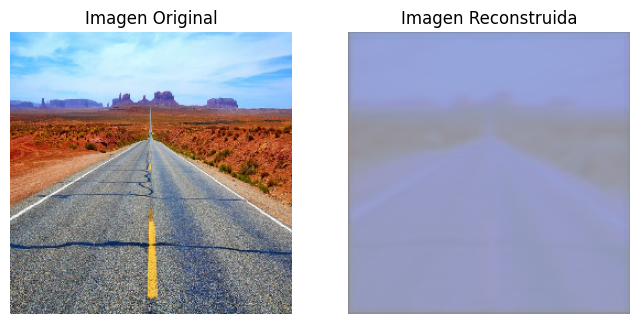

In [23]:
from google.colab import drive
drive.mount('/content/drive')




import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization
import keras
# Establecer la variable de entorno para forzar el uso de la CPU
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
image_path = '/content/drive/MyDrive/druida/coche.jpg'



# Cargar la imagen desde la ruta especificada

original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Normalizar la imagen a valores entre 0 y 1
original_image = original_image / 255.0

# Redimensionar todas las imágenes a un tamaño fijo (puedes ajustar según tus necesidades)
target_size = (256, 256)
original_image = cv2.resize(original_image, target_size)

# Agregar una dimensión para representar el lote (batch) de imágenes
original_image = np.expand_dims(original_image, axis=0)

# Definir la arquitectura del modelo encoder-decoder mejorado
input_layer = Input(shape=(target_size[0], target_size[1], 3))

# Encoder
encoder = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
encoder = BatchNormalization()(encoder)
encoder = MaxPooling2D((2, 2), padding='same')(encoder)

encoder = Conv2D(128, (3, 3), activation='relu', padding='same')(encoder)
encoder = BatchNormalization()(encoder)
encoder = MaxPooling2D((2, 2), padding='same')(encoder)

# Decoder
decoder = Conv2D(128, (3, 3), activation='relu', padding='same')(encoder)
decoder = BatchNormalization()(decoder)
decoder = UpSampling2D((2, 2))(decoder)

decoder = Conv2D(64, (3, 3), activation='relu', padding='same')(decoder)
decoder = BatchNormalization()(decoder)
decoder = UpSampling2D((2, 2))(decoder)

output_layer = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(decoder)

# Crear el modelo
model = Model(inputs=input_layer, outputs=output_layer)

# Compilar el modelo (puedes ajustar la función de pérdida según tu tarea)
model.compile(optimizer='adam', loss='mean_squared_error')

# Visualizar la imagen original
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(original_image[0])
plt.axis('off')

# Tamaño del lote (batch size)
batch_size = 16  # ajusta según tus recursos de GPU/CPU
# Entrenar el modelo
model.fit(original_image, original_image, epochs=20, batch_size=batch_size, verbose=1)

# Obtener la salida del modelo para la imagen original
decoded_image = model.predict(original_image)

# Visualizar la imagen reconstruida por el decoder
plt.subplot(1, 2, 2)
plt.title('Imagen Reconstruida')
plt.imshow(decoded_image[0])
plt.axis('off')

# Mostrar las imágenes
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/20
1/1 [==============================] - 4s 4s/step - loss: 0.1453
Epoch 2/20
1/1 [==============================] - 2s 2s/step - loss: 0.0649
Epoch 3/20
1/1 [==============================] - 1s 1s/step - loss: 0.0387
Epoch 4/20
1/1 [==============================] - 1s 893ms/step - loss: 0.0377
Epoch 5/20
1/1 [==============================] - 1s 896ms/step - loss: 0.0294
Epoch 6/20
1/1 [==============================] - 1s 904ms/step - loss: 0.0213
Epoch 7/20
1/1 [==============================] - 1s 923ms/step - loss: 0.0185
Epoch 8/20
1/1 [==============================] - 1s 945ms/step - loss: 0.0172
Epoch 9/20
1/1 [==============================] - 1s 918ms/step - loss: 0.0156
Epoch 10/20
1/1 [==============================] - 1s 912ms/step - loss: 0.0142
Epoch 11/20
1/1 [==============================] - 1s 911ms/step - loss: 0.0134
Epoch 12/

RuntimeError: ignored

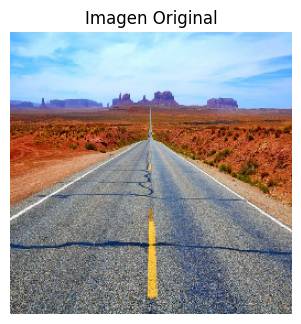

In [24]:
from google.colab import drive
drive.mount('/content/drive')

import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization
import tensorflow as tf

# Cargar la imagen desde la ruta especificada
image_path = '/content/drive/MyDrive/druida/coche.jpg'
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Normalizar la imagen a valores entre 0 y 1
original_image = original_image / 255.0

# Redimensionar todas las imágenes a un tamaño fijo (puedes ajustar según tus necesidades)
target_size = (256, 256)
original_image = cv2.resize(original_image, target_size)

# Agregar una dimensión para representar el lote (batch) de imágenes
original_image = np.expand_dims(original_image, axis=0)

# Definir la arquitectura del modelo encoder-decoder mejorado
input_layer = Input(shape=(target_size[0], target_size[1], 3))

# Encoder
encoder = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
encoder = BatchNormalization()(encoder)
encoder = MaxPooling2D((2, 2), padding='same')(encoder)

encoder = Conv2D(128, (3, 3), activation='relu', padding='same')(encoder)
encoder = BatchNormalization()(encoder)
encoder = MaxPooling2D((2, 2), padding='same')(encoder)

# Decoder
decoder = Conv2D(128, (3, 3), activation='relu', padding='same')(encoder)
decoder = BatchNormalization()(decoder)
decoder = UpSampling2D((2, 2))(decoder)

decoder = Conv2D(64, (3, 3), activation='relu', padding='same')(decoder)
decoder = BatchNormalization()(decoder)
decoder = UpSampling2D((2, 2))(decoder)

output_layer = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(decoder)

# Crear el modelo
model = Model(inputs=input_layer, outputs=output_layer)

# Compilar el modelo (puedes ajustar la función de pérdida según tu tarea)
model.compile(optimizer='adam', loss='mean_squared_error')

# Visualizar la imagen original
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(original_image[0])
plt.axis('off')

# Tamaño del lote (batch size)
batch_size = 16  # ajusta según tus recursos de GPU/CPU
# Entrenar el modelo
model.fit(original_image, original_image, epochs=20, batch_size=batch_size, verbose=1)

# Obtener la salida del modelo para la imagen original
@tf.function
def predict_fn(model, input_data):
    return model.predict(input_data)

decoded_image = predict_fn(model, original_image)

# Visualizar la imagen reconstruida por el decoder
plt.subplot(1, 2, 2)
plt.title('Imagen Reconstruida')
plt.imshow(decoded_image[0])
plt.axis('off')

# Mostrar las imágenes
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/20
1/1 [==============================] - 3s 3s/step - loss: 0.1004
Epoch 2/20
1/1 [==============================] - 1s 975ms/step - loss: 0.0560
Epoch 3/20
1/1 [==============================] - 1s 955ms/step - loss: 0.0405
Epoch 4/20
1/1 [==============================] - 1s 926ms/step - loss: 0.0312
Epoch 5/20
1/1 [==============================] - 1s 940ms/step - loss: 0.0263
Epoch 6/20
1/1 [==============================] - 1s 1s/step - loss: 0.0216
Epoch 7/20
1/1 [==============================] - 1s 1s/step - loss: 0.0179
Epoch 8/20
1/1 [==============================] - 2s 2s/step - loss: 0.0164
Epoch 9/20
1/1 [==============================] - 2s 2s/step - loss: 0.0148
Epoch 10/20
1/1 [==============================] - 2s 2s/step - loss: 0.0135
Epoch 11/20
1/1 [==============================] - 1s 957ms/step - loss: 0.0131
Epoch 12/20
1/1 [=

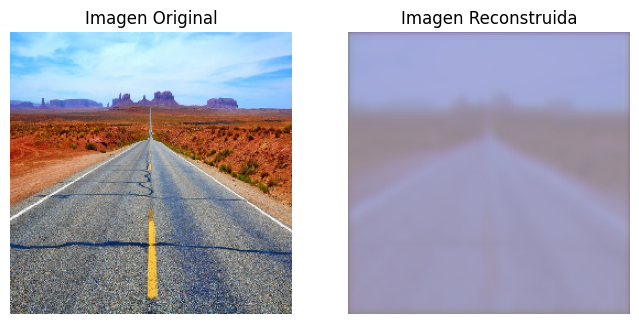

In [25]:
from google.colab import drive
drive.mount('/content/drive')

import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization

# Cargar la imagen desde la ruta especificada
image_path = '/content/drive/MyDrive/druida/coche.jpg'
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Normalizar la imagen a valores entre 0 y 1
original_image = original_image / 255.0

# Redimensionar todas las imágenes a un tamaño fijo (puedes ajustar según tus necesidades)
target_size = (256, 256)
original_image = cv2.resize(original_image, target_size)

# Agregar una dimensión para representar el lote (batch) de imágenes
original_image = np.expand_dims(original_image, axis=0)

# Definir la arquitectura del modelo encoder-decoder mejorado
input_layer = Input(shape=(target_size[0], target_size[1], 3))

# Encoder
encoder = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
encoder = BatchNormalization()(encoder)
encoder = MaxPooling2D((2, 2), padding='same')(encoder)

encoder = Conv2D(128, (3, 3), activation='relu', padding='same')(encoder)
encoder = BatchNormalization()(encoder)
encoder = MaxPooling2D((2, 2), padding='same')(encoder)

# Decoder
decoder = Conv2D(128, (3, 3), activation='relu', padding='same')(encoder)
decoder = BatchNormalization()(decoder)
decoder = UpSampling2D((2, 2))(decoder)

decoder = Conv2D(64, (3, 3), activation='relu', padding='same')(decoder)
decoder = BatchNormalization()(decoder)
decoder = UpSampling2D((2, 2))(decoder)

output_layer = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(decoder)

# Crear el modelo
model = Model(inputs=input_layer, outputs=output_layer)

# Compilar el modelo (puedes ajustar la función de pérdida según tu tarea)
model.compile(optimizer='adam', loss='mean_squared_error')

# Visualizar la imagen original
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(original_image[0])
plt.axis('off')

# Tamaño del lote (batch size)
batch_size = 16  # ajusta según tus recursos de GPU/CPU
# Entrenar el modelo
model.fit(original_image, original_image, epochs=20, batch_size=batch_size, verbose=1)

# Obtener la salida del modelo para la imagen original
decoded_image = model.predict(original_image)

# Visualizar la imagen reconstruida por el decoder
plt.subplot(1, 2, 2)
plt.title('Imagen Reconstruida')
plt.imshow(decoded_image[0])
plt.axis('off')

# Mostrar las imágenes
plt.show()
